<a href="https://colab.research.google.com/github/matheusgneves/data-science-projects/blob/main/Machine_Learning_analisando_pistache_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [11]:
url = 'https://raw.githubusercontent.com/allanspadini/selecao-de-features/main/dados/pistachio.csv'
df = pd.read_csv(url)

In [4]:
df.head()

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  SOLIDITY  \
0  73107  1161.8070    442.4074    217.7261        0.8705  305.0946    0.9424   
1  89272  1173.1810    460.2551    251.9546        0.8369  337.1419    0.9641   
2  60955   999.7890    386.9247    209.1255        0.8414  278.5863    0.9465   
3  79537  1439.5129    466.7973    221.2136        0.8806  318.2289    0.9437   
4  96395  1352.6740    515.8730    246.5945        0.8784  350.3340    0.9549   

   CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  SHAPEFACTOR_1  \
0        77579  0.7710        2.0319     0.6806       0.6896         0.0061   
1        92598  0.7584        1.8267     0.8151       0.7325         0.0052   
2        64400  0.7263        1.8502     0.7663       0.7200         0.0063   
3        84281  0.7568        2.1102     0.4823       0.6817         0.0059   
4       100950  0.7428        2.0920     0.6620       0.6791         0.0054   

   SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPEFACTOR_4              Class  
0         0.0030         0.4756         0.9664  Kirmizi_Pistachio  
1         0.0028         0.5366         0.9802     Siit_Pistachio  
2         0.0034         0.5184         0.9591  Kirmizi_Pistachio  
3         0.0028         0.4648         0.9807  Kirmizi_Pistachio  
4         0.0026         0.4612         0.9648  Kirmizi_Pistachio

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           1718 non-null   int64  
 1   PERIMETER      1718 non-null   float64
 2   MAJOR_AXIS     1718 non-null   float64
 3   MINOR_AXIS     1718 non-null   float64
 4   ECCENTRICITY   1718 non-null   float64
 5   EQDIASQ        1718 non-null   float64
 6   SOLIDITY       1718 non-null   float64
 7   CONVEX_AREA    1718 non-null   int64  
 8   EXTENT         1718 non-null   float64
 9   ASPECT_RATIO   1718 non-null   float64
 10  ROUNDNESS      1718 non-null   float64
 11  COMPACTNESS    1718 non-null   float64
 12  SHAPEFACTOR_1  1718 non-null   float64
 13  SHAPEFACTOR_2  1718 non-null   float64
 14  SHAPEFACTOR_3  1718 non-null   float64
 15  SHAPEFACTOR_4  1718 non-null   float64
 16  Class          1718 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 22

In [23]:
# Separando os dois tipos de pistache por 0 e 1
df['Class'] = df['Class'].map({'Kirmizi_Pistachio': 0, 'Siit_Pistachio': 1})

In [25]:
df.drop(['Kirmizi_Pistachio', 'Siit_Pistachio'], axis=1, inplace=True)

In [26]:
df

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0     73107  1161.8070    442.4074    217.7261        0.8705  305.0946   
1     89272  1173.1810    460.2551    251.9546        0.8369  337.1419   
2     60955   999.7890    386.9247    209.1255        0.8414  278.5863   
3     79537  1439.5129    466.7973    221.2136        0.8806  318.2289   
4     96395  1352.6740    515.8730    246.5945        0.8784  350.3340   
...     ...        ...         ...         ...           ...       ...   
1713  65570  2071.4451    418.0258    217.1458        0.8545  288.9400   
1714  68849  1441.2590    451.0457    205.2553        0.8905  296.0764   
1715  90270  1370.5380    428.9636    269.8232        0.7774  339.0211   
1716  73148  1309.8430    469.0491    208.3141        0.8960  305.1801   
1717  78780  1324.8831    451.5905    239.3016        0.8481  316.7109   

      SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  \
0       0.9424        77579  0.7710        2.0319     0.6806       0.6896   
1       0.9641        92598  0.7584        1.8267     0.8151       0.7325   
2       0.9465        64400  0.7263        1.8502     0.7663       0.7200   
3       0.9437        84281  0.7568        2.1102     0.4823       0.6817   
4       0.9549       100950  0.7428        2.0920     0.6620       0.6791   
...        ...          ...     ...           ...        ...          ...   
1713    0.8976        73054  0.5945        1.9251     0.1920       0.6912   
1714    0.9340        73716  0.6459        2.1975     0.4165       0.6564   
1715    0.9722        92847  0.7400        1.5898     0.6039       0.7903   
1716    0.9376        78014  0.6341        2.2516     0.5358       0.6506   
1717    0.9328        84454  0.7021        1.8871     0.5640       0.7013   

      SHAPEFACTOR_1  SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPEFACTOR_4  Class  
0            0.0061         0.0030         0.4756         0.9664      0  
1            0.0052         0.0028         0.5366         0.9802      1  
2            0.0063         0.0034         0.5184         0.9591      0  
3            0.0059         0.0028         0.4648         0.9807      0  
4            0.0054         0.0026         0.4612         0.9648      0  
...             ...            ...            ...            ...    ...  
1713         0.0064         0.0033         0.4778         0.9197      0  
1714         0.0066         0.0030         0.4309         0.9469      0  
1715         0.0048         0.0030         0.6246         0.9930      1  
1716         0.0064         0.0028         0.4233         0.9532      0  
1717         0.0057         0.0030         0.4919         0.9282      1  

[1718 rows x 17 columns]

In [27]:
X = df.drop(['Class'], axis=1)

In [28]:
y = df['Class']

In [30]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,
                                                        test_size=0.3,
                                                        random_state=50,
                                                        stratify=y)

In [31]:
modelo = RandomForestClassifier(random_state=2)

In [33]:
modelo.fit(X_treino, y_treino)

RandomForestClassifier(random_state=2)

In [34]:
modelo.score(X_teste, y_teste)

0.8643410852713178

In [35]:
df['Class'].value_counts()

Class
0    998
1    720
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='SOLIDITY'>

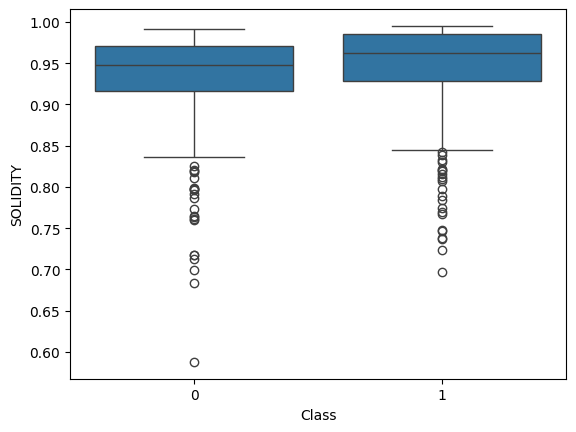

In [36]:
 sns.boxplot(X_treino, x=y_treino, y='SOLIDITY')

In [37]:
correlacao = pd.concat([X_treino, y_treino], axis=1).corr()

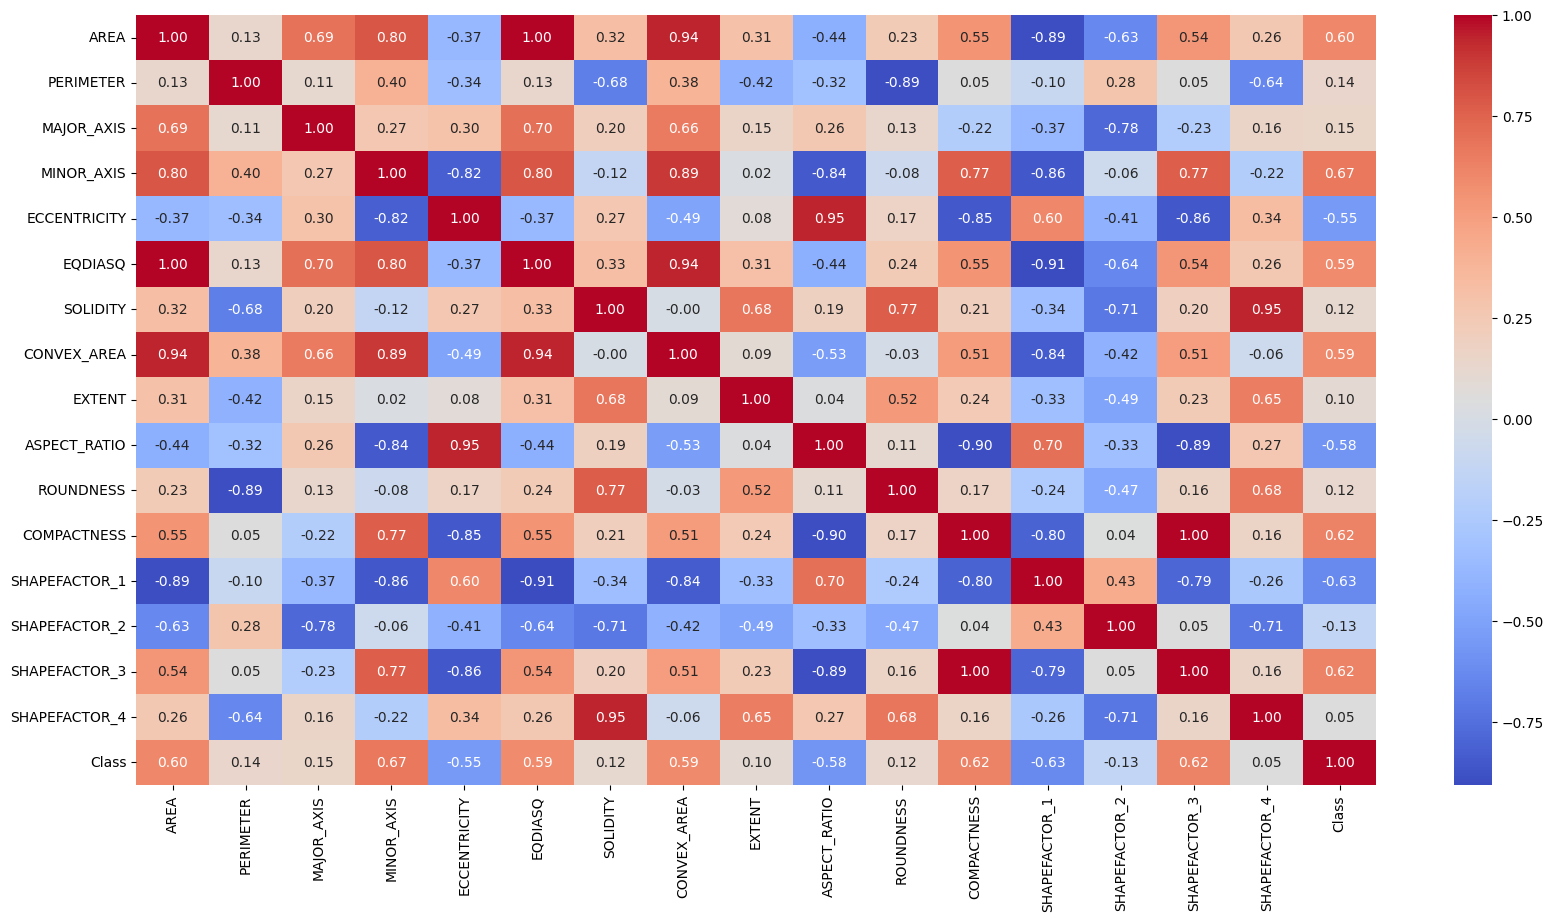

In [38]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f')

plt.show()

In [39]:
importancia = pd.DataFrame({'colunas': X_treino.columns,
                            'importancia': modelo.feature_importances_})

importancia

colunas  importancia
0            AREA     0.057268
1       PERIMETER     0.028737
2      MAJOR_AXIS     0.025804
3      MINOR_AXIS     0.179252
4    ECCENTRICITY     0.048316
5         EQDIASQ     0.036724
6        SOLIDITY     0.029009
7     CONVEX_AREA     0.054696
8          EXTENT     0.030028
9    ASPECT_RATIO     0.048584
10      ROUNDNESS     0.029784
11    COMPACTNESS     0.084365
12  SHAPEFACTOR_1     0.185261
13  SHAPEFACTOR_2     0.009989
14  SHAPEFACTOR_3     0.094308
15  SHAPEFACTOR_4     0.057877

In [40]:
importancia_10 = importancia.sort_values(by='importancia', ascending=False).head(10)

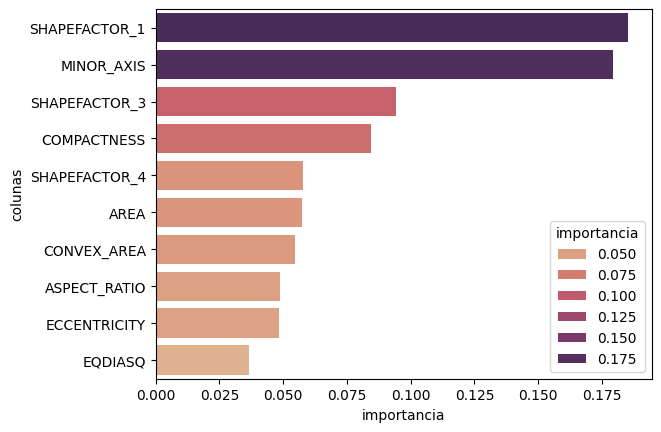

In [41]:
sns.barplot(x='importancia', y='colunas', data=importancia_10, hue='importancia', palette='flare')

plt.show()